# Vegetable Price Prediction Using Machine Learning
Implemented for Bangalore, Ramanagara market (Commodity = Tomato) 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
%matplotlib inline

# Reading Dataset
Vegetable Data is taken from https://agmarknet.gov.in

In [2]:
vegetables = pd.read_csv('Banglore_Tomato.csv')
vegetables.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1,Bangalore,"Binny Mill (F&V), Bangalore",Tomato,Tomato,FAQ,1400,2000,1800,31-Dec-19
1,2,Bangalore,"Binny Mill (F&V), Bangalore",Tomato,Tomato,FAQ,1000,1600,1300,30-Dec-19
2,3,Bangalore,"Binny Mill (F&V), Bangalore",Tomato,Tomato,FAQ,1000,1500,1300,27-Dec-19
3,4,Bangalore,"Binny Mill (F&V), Bangalore",Tomato,Tomato,FAQ,1200,1500,1400,26-Dec-19
4,5,Bangalore,"Binny Mill (F&V), Bangalore",Tomato,Tomato,FAQ,1000,1500,1300,24-Dec-19


# Data Selection

select District Name == Bangalore <br>
Select Market Name == Ramanagara <br>
Then Select Commodity == Tomato

In [3]:
vegetables = vegetables[vegetables['District Name'] == "Bangalore"]
vegetables = vegetables[vegetables['Market Name'] == "Ramanagara"]
vegetables = vegetables[vegetables['Commodity'] == "Tomato"]
vegetables.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
854,855,Bangalore,Ramanagara,Tomato,Tomato,FAQ,1300,1500,1400,31-Dec-19
855,856,Bangalore,Ramanagara,Tomato,Tomato,FAQ,1300,1500,1400,30-Dec-19
856,857,Bangalore,Ramanagara,Tomato,Tomato,FAQ,1300,1500,1400,28-Dec-19
857,858,Bangalore,Ramanagara,Tomato,Tomato,FAQ,1000,1300,1150,27-Dec-19
858,859,Bangalore,Ramanagara,Tomato,Tomato,FAQ,900,1100,1000,26-Dec-19


In [4]:
vegetables['Price Date'] = pd.to_datetime(vegetables['Price Date'])
vegetables['Price Date'] = vegetables['Price Date'].dt.day
vegetables = vegetables.iloc[::-1]
vegetables.tail(10)

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
863,864,Bangalore,Ramanagara,Tomato,Tomato,FAQ,1000,1300,1200,19
862,863,Bangalore,Ramanagara,Tomato,Tomato,FAQ,1000,1200,1100,20
861,862,Bangalore,Ramanagara,Tomato,Tomato,FAQ,1200,1400,1300,21
860,861,Bangalore,Ramanagara,Tomato,Tomato,FAQ,1000,1400,1200,23
859,860,Bangalore,Ramanagara,Tomato,Tomato,FAQ,1000,1400,1200,24
858,859,Bangalore,Ramanagara,Tomato,Tomato,FAQ,900,1100,1000,26
857,858,Bangalore,Ramanagara,Tomato,Tomato,FAQ,1000,1300,1150,27
856,857,Bangalore,Ramanagara,Tomato,Tomato,FAQ,1300,1500,1400,28
855,856,Bangalore,Ramanagara,Tomato,Tomato,FAQ,1300,1500,1400,30
854,855,Bangalore,Ramanagara,Tomato,Tomato,FAQ,1300,1500,1400,31


# Reading Climate Data
Weather Data is taken from https://www.wunderground.com/ 

In [5]:
climate = pd.read_csv('climate_Banglore_270.csv')
vegetables.reset_index(inplace=True)
vegetables[['Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min','Pressure_Avg','Precipitation_Total']] = climate[['Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min', 'Pressure_Avg', 'Precipitation_Total']]
print(vegetables.head())
data = vegetables[['Price Date', 'Modal Price (Rs./Quintal)', 'Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min','Pressure_Avg', 'Precipitation_Total']] 
X = vegetables[['Price Date','Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min', 'Pressure_Avg', 'Precipitation_Total']]
y = vegetables[['Modal Price (Rs./Quintal)']]
print(X.shape)

   index  Sl no. District Name Market Name Commodity Variety Grade  \
0   1149    1150     Bangalore  Ramanagara    Tomato  Tomato   FAQ   
1   1148    1149     Bangalore  Ramanagara    Tomato  Tomato   FAQ   
2   1147    1148     Bangalore  Ramanagara    Tomato  Tomato   FAQ   
3   1146    1147     Bangalore  Ramanagara    Tomato  Tomato   FAQ   
4   1145    1146     Bangalore  Ramanagara    Tomato  Tomato   FAQ   

   Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0                     1300                     1500   
1                     1500                     1700   
2                     1500                     1700   
3                     1600                     1800   
4                     2500                     2700   

   Modal Price (Rs./Quintal)  ...    Dew_Avg    Dew_Min  Humid_Max  Humid_Avg  \
0                       1400  ...  66.575185  56.492593  99.914815  79.618148   
1                       1600  ...  66.517037  56.429630  99.914815  79.604074   
2    

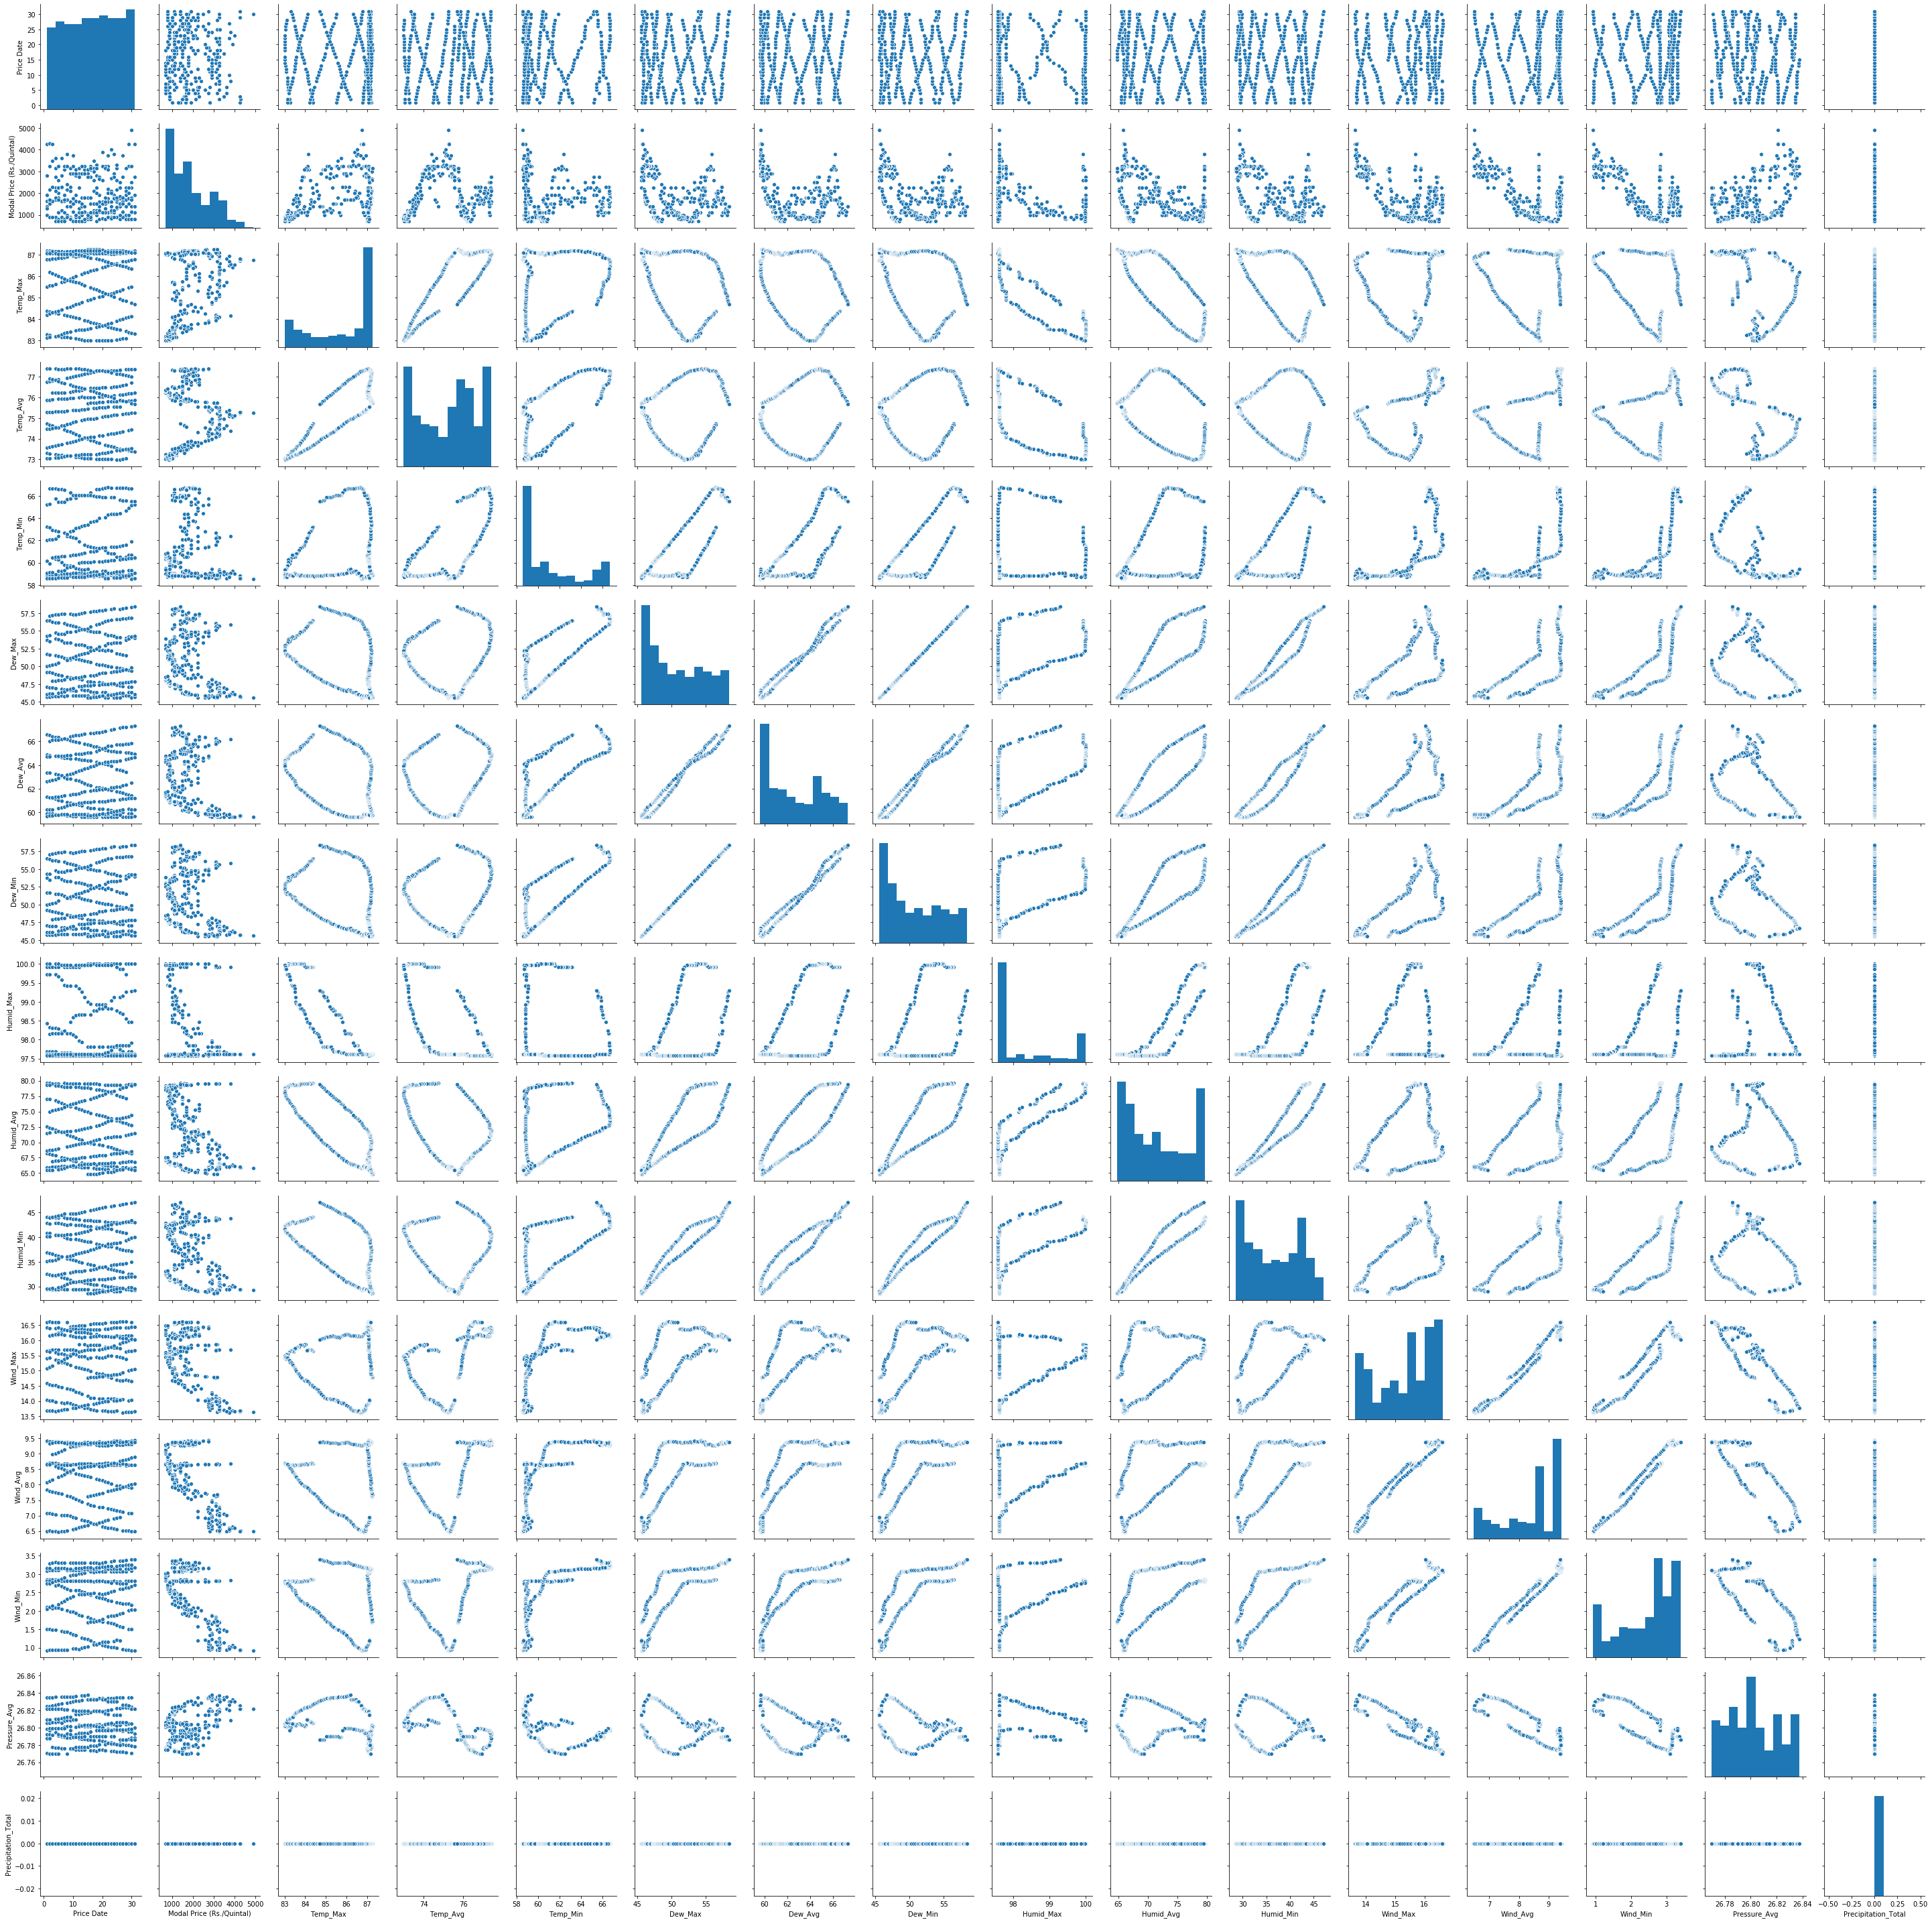

In [6]:
sns.pairplot(data)

# Data is splitted into train and test set.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import math

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X[:-1], y[:-1], test_size=0.3, random_state=42, shuffle = True)

# Implementation Of Algorithm 
Implementing Random Forest algorithm

In [9]:
start = time.time()
regr = RandomForestRegressor(n_estimators = 1000,max_depth=1000, random_state=20, criterion="mae", min_samples_split=2, oob_score = True)
regr.fit(X_train,np.reshape(np.array(y_train), (len(y_train), )))
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 8.526726722717285


In [10]:
predicted = regr.predict(X_test)

# Accuracy For Training and Testing Set

In [11]:
#print(y_test, predicted)
print(regr.score(X_train, y_train))
print(regr.score(X_test, y_test))

0.9875986362322069
0.9043152888654192


# Feature Importance

In [12]:
a = np.reshape(regr.feature_importances_, (len(regr.feature_importances_),1))
a = a.tolist()
col = X.columns
for i in range(0,15):
    print(col[i],  "->" , a[i][0])

Price Date -> 0.0337787448402997
Temp_Max -> 0.03430672169627758
Temp_Avg -> 0.11341327680182359
Temp_Min -> 0.08749406396183448
Dew_Max -> 0.02094873168191108
Dew_Avg -> 0.03601057913060806
Dew_Min -> 0.019045655557605158
Humid_Max -> 0.003953233989150494
Humid_Avg -> 0.03511112576274253
Humid_Min -> 0.025303310024731657
Wind_Max -> 0.10203414257341986
Wind_Avg -> 0.1826612522209461
Wind_Min -> 0.270659413478607
Pressure_Avg -> 0.03527974828004269
Precipitation_Total -> 0.0


# predicted vs Actual

In [13]:
b= y_test.values
b = b.reshape((len(b),))
l = len(b)
sum_a = 0
for i in range(len(predicted)):
    print(str(predicted[i]) +"->"+ str(b[i]))
    sum_a = sum_a + abs(predicted[i] - b[i])

1933.4->2100
2858.625->3150
2107.825->2100
2151.05->1600
1636.525->1500
3043.05->3100
822.2->800
1490.4->1500
1252.8->1100
3075.75->2750
3066.6->3100
1195.45->1150
985.55->1100
1985.05->1900
1794.075->1600
830.4->900
815.15->900
1746.4->1600
1913.15->1800
4125.8->3600
2920.8->3150
1773.425->1650
2974.275->3100
3084.7->3250
3197.4->3250
2513.725->3100
2073.8->1750
2049.4->2150
1628.5->1800
915.25->850
819.05->800
933.2->1000
1785.3->2250
1785.85->1900
708.5->700
1254.4->1100
1086.85->1150
3844.75->3250
1360.25->1500
739.25->700
915.2->800
1068.65->900
1220.6->1400
3016.7->2800
962.1->900
1772.15->1600
1484.6->1100
1622.975->1300
2983.05->3800
1332.8->1150
1713.975->1750
2978.85->3250
982.4->1100
1569.55->1750
2434.2->1900
1567.1->1500
900.75->800
3008.3->2800
4186.7->3750
2713.875->3150
1040.6->1050
1824.95->1500
1543.1->1500
1919.4->1500
1080.25->1100
3197.6->2900
1548.3->1150
1525.4->1500
1039.8->1200
1142.7->1150
2966.325->3000
1281.55->1000
1749.2->1400
3211.5->3250
1987.45->1600
36

In [14]:
print(sum_a/l)

205.9575842696629


# Create picke file

In [15]:
import pickle
filename = 'Banglore_Tomato'
outfile = open(filename,'wb')
pickle.dump(regr,outfile)
outfile.close()

In [16]:
filename = 'Banglore_Tomato'
with open(filename, "rb") as f:
    rf = pickle.load(f)
predicted = rf.predict(X)
actual= np.reshape(np.array(y),(len(y),))
#print(predicted,actual)
sum = 0
for i in range(len(predicted)):
    #print(str(actual[i]) + "->" + str(predicted[i]))
    sum = sum +abs(actual[i] - predicted[i])
f.close()

# Total Error

In [17]:
print(sum/len(actual)) 

116.94045608108112
